<a href="https://colab.research.google.com/github/chaves08r/Projetos-pessoais/blob/main/redes_neurais_corrigida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

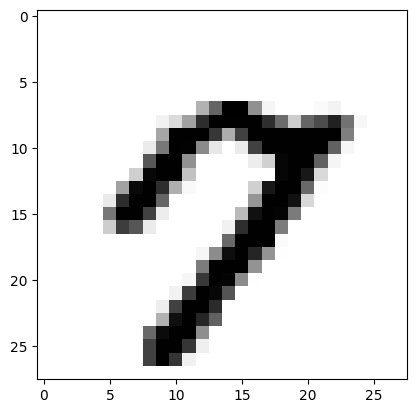

torch.Size([1, 28, 28])
torch.Size([])
Epoch 1 - perda resultante: 1.2144407886050657
Epoch 2 - perda resultante: 0.3820294948147812
Epoch 3 - perda resultante: 0.31149678726567387
Epoch 4 - perda resultante: 0.27184245631352927
Epoch 5 - perda resultante: 0.24106349396521348
Epoch 6 - perda resultante: 0.2163527392939146
Epoch 7 - perda resultante: 0.19438656383771885
Epoch 8 - perda resultante: 0.17629196490051904
Epoch 9 - perda resultante: 0.16064065342733283
Epoch 10 - perda resultante: 0.14729275323871546

Tempo de treino (em minutos) =  1.6042372743288675
Total de imagens testadas = 10000

Precisão do modelo = 95.74%


In [2]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

transform = transforms.ToTensor()

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r')
plt.show()

print(imagens[0].size())
print(etiquetas[0].size())

class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.linear_layer1 = nn.Linear(28*28, 128)
        self.linear_layer2 = nn.Linear(128, 64)
        self.linear_layer3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.linear_layer1(x))
        x = F.relu(self.linear_layer2(x))
        x = self.linear_layer3(x)
        return F.log_softmax(x, dim=1)

def treino(modelo, trainloader, device):
    otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)
    inicio = time()
    criterio = nn.NLLLoss()
    EPOCHS = 10
    modelo.train()

    for epoch in range(EPOCHS):
        perda_acumulada = 0

        for imagens, etiquetas in trainloader:
            imagens = imagens.view(imagens.shape[0], -1)
            otimizador.zero_grad()

            output = modelo(imagens.to(device))
            perda_instantanea = criterio(output, etiquetas.to(device))

            perda_instantanea.backward()
            otimizador.step()

            perda_acumulada += perda_instantanea.item()

        print("Epoch {} - perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))

    print("\nTempo de treino (em minutos) = ", (time()-inicio)/60)

def validacao(modelo, valloader, device):
    conta_corretas, conta_todas = 0, 0
    for imagens, etiquetas in valloader:
        for i in range(len(etiquetas)):
            img = imagens[i].view(1, 784)

            with torch.no_grad():
                logps = modelo(img.to(device))

            ps = torch.exp(logps)
            probab = list(ps.cpu().numpy()[0])
            etiqueta_pred = probab.index(max(probab))
            etiqueta_certa = etiquetas.numpy()[i]
            if(etiqueta_certa == etiqueta_pred):
                conta_corretas += 1
            conta_todas += 1

    print("Total de imagens testadas =", conta_todas)
    print("\nPrecisão do modelo = {}%".format(conta_corretas*100/conta_todas))

# Certifique-se de escolher o dispositivo correto (CPU ou GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instanciando o modelo e movendo-o para o dispositivo adequado
modelo = Modelo().to(device)

# Treinamento do modelo
treino(modelo, trainloader, device)

# Avaliação do modelo
validacao(modelo, valloader, device)
